## Sistemas de recomendación

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/ml-100k/u.data.csv", sep="\t",header= None)

In [3]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df.columns=["UserID","ItemID","Rating","TimeStamp"]

In [6]:
df.head(20)

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [7]:
df.loc[df['UserID'] == 1]

,UserID,ItemID,Rating,TimeStamp
202,1,61,4,878542420
305,1,189,3,888732928
333,1,33,4,878542699
334,1,160,4,875072547
478,1,20,4,887431883
...,...,...,...,...
92049,1,28,4,875072173
92487,1,172,5,874965478
94019,1,122,3,875241498
96699,1,152,5,878542589


In [8]:
df.groupby(["UserID"])["UserID"].count() 

UserID
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: UserID, Length: 943, dtype: int64

In [9]:
df.groupby(["ItemID"])["ItemID"].count() 

ItemID
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: ItemID, Length: 1682, dtype: int64

* UserID ----> identificador de usuario
* ItemID ----> identificador de la película 
* Rating ----> es la valoración 
* TimeStamp--> fecha de la valoración en segundos 

### Análisis exploratorio de los items

In [15]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

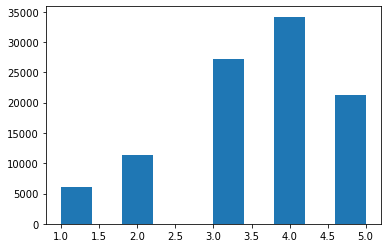

In [11]:
plt.hist(df.Rating) # Cómo se distribuyten las valoraciones 

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <a list of 10 Patch objects>)

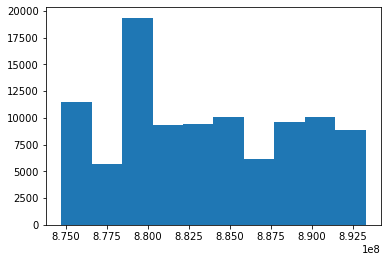

In [12]:
plt.hist(df.TimeStamp)

In [13]:
df.groupby(["Rating"])["UserID"].count() # Agrupado por valoración vemos cuántos usuarios las han hecho 

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

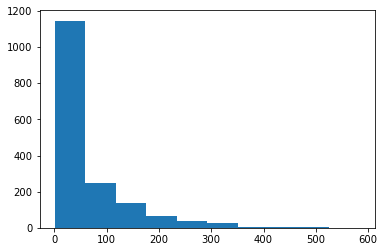

In [14]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count()) # cuántas personas han visto determinada pelicula

# Hay películas que han sido más vistas
# el identificador de películas esta en el eje horizontal del historgrama

In [16]:
import numpy as np

## Representación en forma matricial

In [17]:
n_users = df.UserID.unique().shape[0]
n_users

943

In [18]:
n_items =df.ItemID.unique().shape[0] #número de películas
n_items

1682

In [19]:
ratings = np.zeros((n_users,n_items)) # filas ---> usuarios
                                    #columnas --> películas

In [23]:
ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
#for i in range(0,len(ratings[0])):
 #   print(ratings[0,i])


In [25]:
ratings[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
# ratings será una "sparse matrix" lo que significa que row[1]-1 representará la fila dónde de encontrará el valor row[3] 
# y row[2]-1 será la columna dónde se encontrará el  valor row[3] de tal manera que si queremos ver dónde está el 
# valor de la valoración de la primera fila en el data set original, esto es:

In [27]:
df.head(1) # valoración de la primera fila del data set original

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949


In [28]:
for row in df.itertuples():# Itere sobre filas de DataFrame como nombres de tuplas. 
    
    ratings[row[1]-1, row[2]-1] = row[3] # Usuarios del data set empiezan en 1 e índices de python empiezan en 0
    
    #print("[row[1]-1, row[2]-1]:",[row[1]-1, row[2]-1])
    #print("row[3]:",row[3])
    
#print("ratings:",ratings)    
    # row[1]-1 --> restar valor de filas de UserID menos 1
    # row[2]-1 --> restar valor de filas de ItemID menos 1

In [29]:
ratings # Esta ya es la "sparse matrix"

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [30]:
# entonces para encontrar el valor de df.head(1) em la matriz anterior tendremos que calcular :

ratings[195][241]


3.0

In [31]:
# El cual coincide con el valor del rating para la primera fila del data set original

In [32]:
sparsity = float(len(ratings.nonzero()[0]))

sparsity/=(ratings.shape[0]*ratings.shape[1])

sparsity *=100

print("Coeficiente de sparseiedad:{:4.2f}%".format(sparsity))

Coeficiente de sparseiedad:6.30%


In [29]:
#6.30% corresponde a las 100,000 valoraciones del data set original pues la "sparse matrix" contiene en total 1,586,126 
# de entradas y al multiplicar este número por .0630(%6.30) se obtiene:

# 1586126*.0630 =99,999 (aproximadamente 100,000) 

# lo cual es consistente con lo antes dicho

### Crear conjuntos de entrenamiento y validación

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.3, random_state=42)

In [32]:
ratings_train.shape # 660 personas / conjunto de train de 70% / semilla aleatoria = 42

(660, 1682)

In [33]:
ratings_test.shape # conjunto de test de 30% / a estos usuarios les vamos a ofrecer una recomendación 

(283, 1682)

#### Recordar que el número de usuarios es de 943 y el número de películas es de 1682

In [34]:
# Conozco a un usuario que sé qué películas ha visto y qué valopración les ha dado 
# puedo intentar inferir los gustos de un usuario parecido a este a la Netflix

### Filtro colaborativo basado en Usuarios

* Matriz de similaridad entre los usuarios(distancia del coseno)

* Predecir la valoración desconocida de un item *i* para un usuario activo *u* basándonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho item

* Recomendaremos los nuevos items a los usuarios según lo establecido en los pasos anteriores 

In [35]:
import numpy as np
import sklearn

In [36]:
sim_matrix = 1- sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [37]:
sim_matrix.shape # la diagonal tiene "unos" porque un usuario es 100 por cien similar a sí mismo

# usuarios parecidos en cuanto  a los items (películas) quw vieron 

(660, 660)

In [38]:
sim_matrix # se usan los usuarios del conjunto de entrenamiento para construir esta matriz 
           # la matriz es simétrica
           # la matriz muestra qué tan perecidos con en gustos los ususarios uno respecto a los demás 


array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [39]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix.sum(axis=1))]).T

# ratings_train ---> shape--->(660, 1682) ---> es la matriz que contiene usuarios y sus valoraciones
#  sim_matrix----> shape(660,660) ---> muestra qué tan parecidos con en gustos los usuarios entre sí dada la distancia coseno

In [40]:
sim_matrix.dot(ratings_train).shape

(660, 1682)

In [41]:
#Cada fila de sim_matrix.dot(ratings_train) se divide entre los valores de:

# i.e ponderamos por todos los usuarios de la misma fila

In [42]:
np.array([np.abs(sim_matrix.sum(axis=1))]).T.shape

(660, 1)

In [43]:
users_predictions # obtenemos la valoración que aproximadamente cada usuario le daría a la película en cuestion
                  #predicción para el conjunto de entrenamiento

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
def get_mse(preds,actuals):
    preds = preds[actuals.nonzero()].flatten() # flatten() pasarlo a vector
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [46]:
get_mse(users_predictions, ratings_train)

7.878218313143215

In [47]:
get_mse(users_predictions, ratings_test)

8.745164067978985

In [48]:
ratings_test.shape

(283, 1682)

In [49]:
ratings_train.shape

(660, 1682)

### Filtro colaborativo basado en los KNN

In [57]:
from sklearn.neighbors import NearestNeighbors

In [58]:
k = 10 # Elegido arbiotrariamente # elegiríamos el top 10 se usuarios más parecidos al mío 


In [59]:
neighbors = NearestNeighbors(k, metric="cosine") # usamos la similaridad del coseno  

C:\Users\I_am_AlexX\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [60]:
neighbors.fit(ratings_train) # ajustar la matriz de valoraciones con k = 10 vecinos más cercanos 

NearestNeighbors(metric='cosine', n_neighbors=10)

In [61]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True) #top_k_distances--> distancias
# de similaridades , top_k_users ---> distancias de usuarios
# return_distance=True ---> para que devuelva además del top usuarios, las similaridades

In [62]:
top_k_distances.shape # top ten de distancias enmtre cada usuario

(660, 10)

In [63]:
top_k_distances[0]

array([0.        , 0.49780748, 0.55784838, 0.56965585, 0.57163621,
       0.57520588, 0.58205174, 0.59226081, 0.59498626, 0.60010163])

In [63]:
top_k_users[0] # 0 indica que son el mismo 
               # cuántro más pequeño está el usuario más cerca está 
 

array([  0, 211,  16, 185, 101, 155, 169, 407, 112, 618], dtype=int64)

In [92]:
top_k_distances[1]

array([ 0.        , 16.85229955, 17.4642492 , 18.        , 18.08314132,
       18.08314132, 18.22086716, 18.49324201, 18.60107524, 18.65475811])

In [93]:
top_k_users[1]


array([  1, 292, 123, 436, 655, 608, 428, 278, 328, 262], dtype=int64)

In [94]:
top_k_users.shape

(660, 10)

In [99]:
ratings_train.shape

(660, 1682)

In [102]:
ratings_train[top_k_users].shape

(660, 10, 1682)

In [73]:
# De todos esos usuarios y debido a la cercanía sólo será la valoración de los mismos la que deberá tomarse en cuenta 
#ponderando todas las valoraciones de estos 

In [81]:
top_k_sim=1-top_k_distances 
users_predicts_k = np.zeros(ratings_train.shape) # predicciones de los k usuarios
for i in range(ratings_train.shape[0]): # para cada usuario del conjunto de entrenamiento ---> ratings_train.shape[0]=660  
    #qué tan lejos está cada usuario de la valoración:
    users_predicts_k[i,:]=top_k_sim[i].T.dot(ratings_train[top_k_users][i]) /np.sum(top_k_sim[i])
    # np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T
    
    # suma por columnas ---> sum(axis=0)
    
    # top_k_distances.shape-->(660,10)
    # ratings_train[top_k_users][i] ratings_train para los usuarios del top k users en la posición iesima
  


In [66]:
ratings_train.shape

(660, 1682)

In [67]:
users_predicts_k.shape 

(660, 1682)

In [68]:
users_predicts_k

array([[2.89130781, 0.93236161, 0.24692982, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67218184, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.74333874, 1.64961816, 1.607813  , ..., 0.        , 0.        ,
        0.        ],
       [2.03035835, 0.31082799, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [82]:
get_mse(users_predicts_k, ratings_train)

2.7564466890655055

In [70]:
get_mse(users_predicts_k, ratings_test)

8.88115052330069

## Análisis para el conjunto de test

In [38]:
from sklearn.neighbors import NearestNeighbors

In [39]:
k = 10 # Elegido arbiotrariamente # elegiríamos el top 10 se usuarios más parecidos al mío 
neighbors = NearestNeighbors(k, metric="cosine") # usamos la similaridad del coseno  

In [40]:
neighbors.fit(ratings_test) # ajustar la matriz de valoraciones con k = 10 vecinos más cercanos 

NearestNeighbors(metric='cosine', n_neighbors=10)

In [41]:
top_k_distances_test, top_k_users_test = neighbors.kneighbors(ratings_test)


In [42]:
top_k_sim_test=1-top_k_distances_test 


In [45]:
user_predicts_test_k = np.zeros(ratings_test.shape) # predicciones de los k usuarios

for i in range(ratings_test.shape[0]): # para cada usuario del conjunto de entrenamiento ---> ratings_train.shape[0]=660  
    #qué tan lejos está cada usuario de la valoración:
    user_predicts_test_k[i,:]=top_k_sim_test[i].T.dot(ratings_train[top_k_users_test][i]) /np.sum(top_k_sim_test[i])
    

    
    


In [51]:
get_mse(user_predicts_test_k, ratings_test)

9.296894162650673